# Problema de transporte discreto - Destinos variables - Con término cuadrático

Dadas dos distribuciones de probabilidad discretas:

* $X$: con soporte $x_1<x_2<\ldots<x_m$ con probabilidades $P(X=x_i) = p_i$.
* $Y$: con soporte $y_1<y_2<\ldots<y_n$ con probabilidades $P(Y=y_j) = q_j$.

Queremos hallar una distribución conjunta $A=(a_{ij}) \geqslant 0$ tal que:

$$\min_{a_{ij}} \sum_{i,j} a_{ij} w_{ij} + \epsilon \sum_{j}\phi (q_{j})$$

sujeto a:

$$\sum_j a_{ij} = p_i \quad \forall i=1,\ldots,m,$$

$$\sum_i a_{ij} = q_j \leq m/(n-1)*\theta \quad \forall j=1,\ldots,(n-1) \,\,(VAR)$$ 

$$\sum_i a_{in} = q_n \quad .$$ 



## Caso 4: 
### Redistribuir cargadores con K-Means

$x_{i}, y_{j} \in R^{2}$

$w_{ij} = |x_{i} - y_{j}|$

$\phi(x) = \frac{x^{2}}{2}$

In [1]:
## Configuración inicial

# m = cantidad de vehículos
m = 300;
x = sortslices(rand(m,2), dims = 1);
p = 2*rand(m) # No son los autos, sino cantida de carga que necesitan (uniforme [0,2] -> media 1)

# n = cantidad de cargadores (totales)
n = 6;
y = sortslices(rand(n,2), dims = 1); #Ubicación inicial aleatoria
y = vcat(y, [2 0.5]) #Se agrega un cargador lejano
n=size(y)[1];

In [2]:
# l = factor limitanta de capacidad de cargadores
l = 10;

# k = cantidad de iteraciones de K-means
k = 5;

In [29]:
# Creación del modelo

using JuMP, GLPK, Ipopt
#revisar paquete distances.JL

#epsilon
eps = 0.01 #200

#model = JuMP.Model(GLPK.Optimizer) #Algoritmo de programación lineal
model = JuMP.Model(Ipopt.Optimizer) #Algoritmo de punto interior

#Calculo los pesos Cij = |xi-yj| (distancia euclidea en R^2)
w1 = (x[:,1]*ones(1,n) - ones(m,1)*y[:,1]').^2
w2 = (x[:,2]*ones(1,n) - ones(m,1)*y[:,2]').^2
W=(w1+w2)#.^(1/2)

@variable(model,A[1:m,1:n]>=0)
@variable(model,q1[1:n-1]<=(m/(n-1)*l)) # carga máxima por auto con tolerancia (no cantidad de autos)
@variable(model,q2) #ultimo cargador sin límite

conp = @constraint(model, sum(A, dims=2).== p)
conq = @constraint(model, sum(A, dims=1).==vcat(q1,q2)')
#conq2 = @constraint(model, sum(A[:, n], dims=1).==q2')

@objective(model,Min, sum( A.*W ) + eps/2 * (vcat(q1,q2)'*vcat(q1,q2)) )
#@objective(model,Min, sum( A.*W ))

model

A JuMP Model
Minimization problem with:
Variables: 2107
Objective function type: QuadExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 307 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 2100 constraints
`VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 6 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt
Names registered in the model: A, q1, q2

In [30]:
optimize!(model);

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     4207
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        7

Total number of variables............................:     2107
                     variables with only lower bounds:     2100
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        6
Total number of equality constraints.................:      307
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.2208015e+01 3.00e+00 1.29e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [31]:
objective_value(model)

78.94381297118215

In [32]:
#Extraigo el valor optimo
#value.(A)
round.(value.(A), digits=3)

300×7 Matrix{Float64}:
  0.711  -0.0    -0.0  -0.0  -0.0    -0.0    -0.0
  1.678   0.0    -0.0  -0.0  -0.0    -0.0    -0.0
  1.655   0.0    -0.0  -0.0  -0.0    -0.0    -0.0
  0.188  -0.0    -0.0  -0.0  -0.0    -0.0    -0.0
 -0.0     0.457   0.0  -0.0  -0.0    -0.0    -0.0
 -0.0     0.176   0.0  -0.0  -0.0    -0.0    -0.0
  0.006  -0.0    -0.0  -0.0  -0.0    -0.0    -0.0
  0.812  -0.0    -0.0  -0.0  -0.0    -0.0    -0.0
  1.355  -0.0    -0.0  -0.0  -0.0    -0.0    -0.0
  1.509  -0.0    -0.0  -0.0  -0.0    -0.0    -0.0
 -0.0     0.594   0.0  -0.0  -0.0    -0.0    -0.0
  0.0     1.378  -0.0  -0.0  -0.0    -0.0    -0.0
  0.04    0.0    -0.0  -0.0  -0.0    -0.0    -0.0
  ⋮                                   ⋮      
 -0.0    -0.0    -0.0  -0.0  -0.0     0.853  -0.0
 -0.0    -0.0    -0.0   0.0   1.289  -0.0    -0.0
 -0.0    -0.0    -0.0  -0.0   0.0     0.651  -0.0
 -0.0    -0.0    -0.0  -0.0   1.455   0.0    -0.0
 -0.0    -0.0    -0.0  -0.0   0.0     1.764  -0.0
 -0.0    -0.0    -0.0  -0.0   0

In [33]:
round.(value.(q1), digits=3)

6-element Vector{Float64}:
 48.111
 49.381
 48.424
 47.402
 47.996
 49.501

In [34]:
round.(value.(q2), digits=3)

-0.0

In [35]:
#Extraigo los multiplicadores de p
lambda = dual.(conp);

In [36]:
#Redondea los valores de A para que sean 0 o 1 (Probar)
Ar = round.(value.(A));
Ao = value.(A);

#Separa los puntos por destino (buscando 1s)
#X = [x[findall(x->x==1, Ar[:,i]),1] for i in 1:n];
#Y = [x[findall(x->x==1, Ar[:,i]),2] for i in 1:n];

#Separa los puntos por destino (buscando maximos)
maximos = [argmax(Ao[i,:]) for i in 1:m];
X = [x[findall(x->x==i, maximos),1] for i in 1:n];
Y = [x[findall(x->x==i, maximos),2] for i in 1:n];

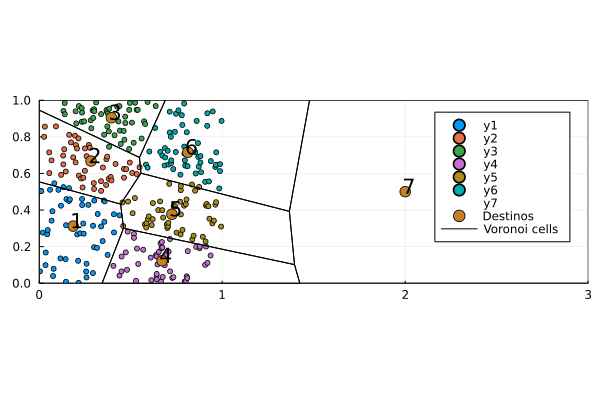

In [37]:
using VoronoiCells
using GeometryBasics
using Plots
using Random

gr()
Plots.GRBackend()

#crea la lista de destinos
points = [Point2(y[i,1], y[i,2]) for i in 1:n] 


#Conjuntos de Voronoi
rect = Rectangle(Point2(0, 0), Point2(3, 1))
tess = voronoicells(points, rect);

scatter(X, Y, aspect_ratio=:equal, markersize = 3, legend = :topright) #Grafica los origenes, con color por destino
scatter!(y[:,1], y[:,2], markersize = 6, label = "Destinos") #Plotea los destinos
annotate!([(points[i][1] + 0.02, points[i][2] + 0.03, text(i, :black)) for i in 1:n]) #Agrega lo números en los destinos
plot!(tess, color = :black)

In [38]:
function calcularCentroides(A,x)
    Ao = value.(A);
    maximos = [argmax(Ao[i,:]) for i in 1:m];
    X = [x[findall(x->x==i, maximos),1] for i in 1:n];
    Y = [x[findall(x->x==i, maximos),2] for i in 1:n];
    #Calcula los centroides (sobreescribe el vector y - cargadores)
    y_nuevo = vcat(hcat([mean(X[i]) for i in 1:n-1], [mean(Y[i]) for i in 1:n-1]), y[n,:]');
    d = round.(sum((y - y_nuevo).^2, dims=2).^(1/2), digits = 3); #Distancia que se mueven las estaciones
    
    return y_nuevo;
end

calcularCentroides (generic function with 1 method)

In [39]:
# Calcular los centroides (¿Del total de los puntos o de los asignados?)

using Statistics

y_nuevo = calcularCentroides(A,x);

# === DEL TOTAL DE LOS PUNTOS ===
#Calculo los pesos Cij = |xi-yj| (distancia euclidea en R^2)
#w1 = (x[:,1]*ones(1,n) - ones(m,1)*y[:,1]').^2
#w2 = (x[:,2]*ones(1,n) - ones(m,1)*y[:,2]').^2
#W=(w1+w2).^(1/2)
#Separa los puntos por destino (buscando el más cercano)
#idx_dist_min = [argmin(Ao[i,:]) for i in 1:m];
#X = [x[findall(x->x==i, idx_dist_min),1] for i in 1:n];
#Y = [x[findall(x->x==i, idx_dist_min),2] for i in 1:n];
#Calcula los centroides (sobreescribe el vector y - cargadores)
#y_nuevo = vcat(hcat([mean(X[i]) for i in 1:n-1], [mean(Y[i]) for i in 1:n-1]), y[n,:]');
#d = round.(sum((y - y_nuevo).^2, dims=2).^(1/2), digits = 3)

# === DE LOS ASIGNADOS A UN CARGADOR (¿Converge?) ===
#Ao = value.(A);
#maximos = [argmax(Ao[i,:]) for i in 1:m];
#X = [x[findall(x->x==i, maximos),1] for i in 1:n];
#Y = [x[findall(x->x==i, maximos),2] for i in 1:n];
##Calcula los centroides (sobreescribe el vector y - cargadores)
#y_nuevo = vcat(hcat([mean(X[i]) for i in 1:n-1], [mean(Y[i]) for i in 1:n-1]), y[n,:]');
#d = round.(sum((y - y_nuevo).^2, dims=2).^(1/2), digits = 3)


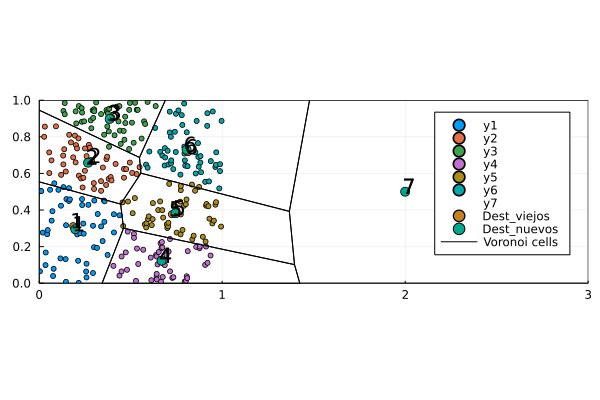

In [40]:
#crea la lista de destinos (nuevos)
points_nuevos = [Point2(y_nuevo[i,1], y_nuevo[i,2]) for i in 1:n] 

scatter(X, Y, aspect_ratio=:equal, markersize = 3, legend = :topright) #Grafica los origenes, con color por destino
scatter!(y[:,1], y[:,2], markersize = 4, label = "Dest_viejos") #Plotea los destinos viejos
scatter!(y_nuevo[:,1], y_nuevo[:,2], markersize = 5, label = "Dest_nuevos") #Plotea los destinos nuevos
annotate!([(points[i][1] + 0.02, points[i][2] + 0.03, text(i, :black)) for i in 1:n]) #Agrega lo números en los destinos
annotate!([(points_nuevos[i][1] + 0.02, points_nuevos[i][2] + 0.03, text(i, :black)) for i in 1:n]) #Agrega lo números en los destinos
plot!(tess, color = :black)

In [41]:
y = y_nuevo

7×2 Matrix{Float64}:
 0.197414  0.295079
 0.267471  0.658361
 0.385244  0.897819
 0.668768  0.123044
 0.744898  0.382324
 0.805643  0.729131
 2.0       0.5